In [ ]:
## If Running in google colab
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
! ls /content/drive/MyDrive/CSE\ 215

 Aurora_Evaluation.gdoc			       FPDB_evaluation.gdoc
 Azure_evaluation.gdoc			       JOB_evaluation.gdoc
 Bao_evaluation.gdoc			       many_to_one_cats_testing.ipynb
 BAO_Slides.gslides			       model_addition_testing.ipynb
 Data_Tamer_evaluation.gdoc		      'Project Proposal.gdoc'
 DeltaLake_evaluation.gdoc		       RocksDB_evaluation.gdoc
 display.csv				       scale_testing.ipynb
 display.gsheet				       scale_variance_take_two.ipynb
 Distributed_CC_Evaluation.gdoc		       scale_variance_testing.ipynb
 distribution_drift_testing.ipynb	       Snowflake_Evaluation.gdoc
 distribution_drift_testing_old.ipynb	       Spark_evaluation.gdoc
 Eliminating_Unscalable_Coms_evaluation.gdoc   stats_testing.ipynb
 F2FS_evaluation.gdoc			       testing_notebook.ipynb
 FalconDB_evaluation.gdoc		      'Untitled presentation.gslides'
 fdmc_subset.csv			      'Untitled spreadsheet.gsheet'
 file_layout.xlsx			       WBL_evaluation.gdoc
 fnma_subset.csv


In [ ]:
!cp /content/drive/MyDrive/CSE\ 215/fdmc_subset.csv .
!cp /content/drive/MyDrive/CSE\ 215/fnma_subset.csv .

In [ ]:
import numpy as np
import pandas as pd


fdmc = pd.read_csv('fdmc_subset.csv').drop(['Unnamed: 0', 'id_loan'], axis=1)
fnma = pd.read_csv('fnma_subset.csv').drop('Unnamed: 0', axis=1)

fdmc['POSTAL CODE'] = [int(str(val)[:3]) for val in fdmc['POSTAL CODE']]
fdmc['CREDIT SCORE'].loc[fdmc.index[fdmc['CREDIT SCORE'] == 9999]] = np.nan



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
import string

LETTERS = string.ascii_letters

potential_cats_fdmc = []
potential_numeric_fdmc = []
nonunique_fdmc = []
for col in fdmc:
    has_letters = False
    letter_count = 0
    for val in fdmc[col]:
        if any([char in LETTERS for char in str(val)]):
            letter_count +=1 
    if letter_count > 0.95*fdmc.shape[0]:
        has_letters = True
    if len(fdmc[col].unique()) == 1:
        nonunique_fdmc.append(col)
        continue
    if has_letters or len(fdmc[col].unique())<10:
        potential_cats_fdmc.append(col)
    else:
        potential_numeric_fdmc.append(col)
fdmc_numeric = potential_numeric_fdmc
fdmc_cats = potential_cats_fdmc
print('FDMC Categorical')
print(potential_cats_fdmc)
print('FDMC Numeric')
print(potential_numeric_fdmc)
print('FDMC Nonunique')
print(nonunique_fdmc)


FDMC Categorical
['FIRST_PAYMENT_DATE', 'FIRST_TIME_HOMEBUYER_FLAG', 'MI_PERCENTAGE', 'NUMBER_OF_UNITS', 'OCCUPANCY_STATUS', 'CHANNEL', 'STATE', 'PROPERTY TYPE', 'LOAN_PURPOSE', 'NUMBER_BORROWERS', 'SELLER NAME', 'Servicer_Name', 'SUPER CONFORMING FLAG', 'PROGRAM INDICATOR', 'PROPERTY_VALUATION_METHOD']
FDMC Numeric
['CREDIT SCORE', 'MATURITY_DATE', 'MSA_CODE', 'ORIGINAL_CLTV', 'DTI', 'ORIGINAL_UPB', 'ORIGINAL_LTV', 'ORIGINAL_INTEREST_RATE', 'POSTAL CODE', 'ORIGINAL_LOAN_TERM']
FDMC Nonunique
['PPM_FLAG', 'Amortization_type', 'LSN', 'HARP_INDICATOR', 'IO_INDICATOR']


In [ ]:
potential_cats_fnma = []
potential_numeric_fnma = []
nonunique_fnma = []
for col in fnma:
    has_letters = False
    letter_count = 0
    for val in fnma[col]:
        if any([char in LETTERS for char in str(val)]):
            letter_count +=1 
    if letter_count > 0.95*fnma.shape[0]:
        has_letters = True
    if len(fnma[col].unique()) == 1:
        nonunique_fnma.append(col)
        continue
    if has_letters or len(fnma[col].unique())<10:
        potential_cats_fnma.append(col)
    else:
        potential_numeric_fnma.append(col)
fnma_numeric = potential_numeric_fnma
fnma_cats = potential_cats_fnma
print('FNMA Categorical')
print(potential_cats_fnma)
print('FNMA Numeric')
print(potential_numeric_fnma)
print('FNMA Nonunique')
print(nonunique_fnma)


FNMA Categorical
['Monthly Reporting Period', 'Channel', 'Seller Name', 'Servicer Name', 'First Payment Date', 'Number of Borrowers', 'First Time Home Buyer Indicator', 'Loan Purpose', 'Property Type', 'Number of Units', 'Occupancy Status', 'Property State', 'Mortgage Insurance Percentage', 'Current Loan Delinquency Status', 'Loan Payment History', 'Modification Flag', 'Zero Balance Code', 'Zero Balance Effective Date', 'UPB at the Time of Removal', 'Mortgage Insurance Type', 'Servicing Activity Indicator', 'HomeReady® Program Indicator', 'Relocation Mortgage Indicator', 'Property Valuation Method', 'High Balance Loan Indicator', 'Borrower Assistance Plan', 'Alternative Delinquency Resolution']
FNMA Numeric
['Loan Identifier', 'Original Interest Rate', 'Current Interest Rate', 'Original UPB', 'Current Actual UPB', 'Original Loan Term', 'Origination Date', 'Loan Age', 'Remaining Months to Legal Maturity', 'Remaining Months To Maturity', 'Maturity Date', 'Original Loan to Value Ratio (LT

In [ ]:
match_list = {
    'FIRST_PAYMENT_DATE':'First Payment Date', 
    'FIRST_TIME_HOMEBUYER_FLAG':'First Time Home Buyer Indicator', 
    'MI_PERCENTAGE':'Mortgage Insurance Percentage', 
    'NUMBER_OF_UNITS':'Number of Units', 
    'OCCUPANCY_STATUS':'Occupancy Status', 
    'CHANNEL':'Channel', 
    'STATE':'Property State', 
    'PROPERTY TYPE':'Property Type',
    'LOAN_PURPOSE':'Loan Purpose', 
    'NUMBER_BORROWERS':'Number of Borrowers', 
    'SELLER NAME':'Seller Name', 
    'Servicer_Name':'Servicer Name', 
    'SUPER CONFORMING FLAG':'High Balance Loan Indicator', 
    'PROGRAM INDICATOR':'HomeReady® Program Indicator', 
    'PROPERTY_VALUATION_METHOD':'Property Valuation Method',
    'CREDIT SCORE':'Borrower Credit Score at Origination',
    'MATURITY_DATE':'Maturity Date', 
    'MSA_CODE':'Metropolitan Statistical Area (MSA)', 
    'ORIGINAL_CLTV':'Original Combined Loan to Value Ratio\n(CLTV)', 
    'DTI':'Debt-To-Income (DTI)', 
    'ORIGINAL_UPB':'Original UPB', 
    'ORIGINAL_LTV':'Original Loan to Value Ratio (LTV)', 
    'ORIGINAL_INTEREST_RATE':'Original Interest Rate', 
    'POSTAL CODE':'Zip Code Short', 
    'ORIGINAL_LOAN_TERM':'Original Loan Term'
}


### Select Column for Experimentation


In [ ]:
co_inds = np.where(fnma['Property Type'] == 'SF')[0]

inds_to_change = np.random.choice(co_inds, size = len(co_inds)//2, replace=False)
fnma['Property Type'].iloc[inds_to_change] = 'SF_1'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
# Define unique null placeholder for schema that doesn't interfere with known columns
import copy 
from scipy import stats

fdmc_copy = copy.deepcopy(fdmc)
for col in potential_numeric_fdmc:
    fdmc_copy[col] = fdmc_copy[col].fillna(np.mean(fdmc_copy[col]))

fnma_copy = copy.deepcopy(fnma)
for col in potential_numeric_fnma:
    fnma_copy[col] = fnma_copy[col].fillna(np.mean(fnma_copy[col]))

def standardize_labels(col):
    col = copy.deepcopy(col)
    value_counts = col.value_counts(dropna = False)
    for i in range(len(value_counts)):
        if str(value_counts.index[i]) == 'nan':
            col.loc[col.isnull()] = i+1
        else:
            col.loc[col == value_counts.index[i]] = i+1
    return col

for col in potential_cats_fdmc:
    fdmc_copy[col] = standardize_labels(fdmc_copy[col])

for col in potential_cats_fnma:
    fnma_copy[col] = standardize_labels(fnma_copy[col])



### Say we have a match-- how do we unite those matches into a 1:1 label relationship?

## 1- K Means


In [ ]:
built_up_dataset = pd.DataFrame(columns=fnma.columns)
max_val = max(fnma_copy['Property Type'].value_counts())
for val in fnma_copy['Property Type'].value_counts().index:
    val_inds = np.where(fnma_copy['Property Type'] == val)[0]
    inds_to_upsample = np.random.choice(val_inds, size = max_val, replace=True)
    built_up_dataset = built_up_dataset.append(fnma_copy.iloc[inds_to_upsample])



In [ ]:
built_up_dataset['Property Type'].value_counts(dropna=False)

1    7733
2    7733
3    7733
4    7733
5    7733
6    7733
Name: Property Type, dtype: int64

In [ ]:
fdmc['PROPERTY TYPE'].value_counts(dropna=False)

SF    16138
PU     6804
CO     1916
MH      107
CP       35
Name: PROPERTY TYPE, dtype: int64

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import copy

usable_cols = fnma_numeric+fnma_cats
scaler = StandardScaler()
scaler.fit(built_up_dataset[usable_cols])
built_up_dataset = pd.DataFrame(scaler.transform(built_up_dataset[usable_cols]), columns = usable_cols)

num_centroid = len(fdmc['PROPERTY TYPE'].value_counts(dropna=False))

built_up_dataset = copy.deepcopy(built_up_dataset[usable_cols].drop('Property Type', axis=1))
# scaler.fit(built_up_dataset)
# built_up_dataset = scaler.transform(built_up_dataset)

fnma_modeling_subset = copy.deepcopy(fnma_copy[usable_cols].drop('Property Type', axis=1))
scaler.fit(fnma_modeling_subset)
fnma_modeling_subset = scaler.transform(fnma_modeling_subset)

kmeans = KMeans(n_clusters=num_centroid, random_state=0).fit(built_up_dataset)
predicted_clusters = kmeans.predict(fnma_modeling_subset)

for value in list(set(predicted_clusters)):
    inds = np.where(predicted_clusters == value)[0]
    cluster_vals = fnma['Property Type'].iloc[inds]
    print(cluster_vals.value_counts())


SF      3060
SF_1    3033
PU      2687
CO       790
MH        76
CP        15
Name: Property Type, dtype: int64
SF_1    1876
SF      1807
PU      1446
CO       376
MH        30
CP        18
Name: Property Type, dtype: int64
SF_1    470
SF      435
PU      333
CO      162
CP       15
MH        6
Name: Property Type, dtype: int64
PU      21
SF_1    10
SF       7
CO       6
MH       2
Name: Property Type, dtype: int64
PU      2525
SF      2424
SF_1    2344
CO       872
MH       139
CP        15
Name: Property Type, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
labels = ['C1', 'C2', 'C3', 'C4', 'C5']
sf_counts = []
sf_1_counts = []
pu_counts = []
co_counts = []
mh_counts = []
cp_counts = []

for j, value in enumerate(list(set(predicted_clusters))):
    inds = np.where(predicted_clusters == value)[0]
    cluster_vals_vcs = fnma['Property Type'].iloc[inds].value_counts()
    print(cluster_vals_vcs)
    for i, val in enumerate(cluster_vals_vcs):
        if cluster_vals_vcs.index[i] == 'SF':
            sf_counts.append(val)
        elif cluster_vals_vcs.index[i] == 'PU':
            pu_counts.append(val)
        elif cluster_vals_vcs.index[i] == 'CO':
            co_counts.append(val)
        elif cluster_vals_vcs.index[i] == 'SF_1':
            sf_1_counts.append(val)
        elif cluster_vals_vcs.index[i] == 'MH':
            mh_counts.append(val)
        elif cluster_vals_vcs.index[i] == 'CP':
            cp_counts.append(val)

    for item in [sf_counts, pu_counts, co_counts, sf_1_counts, mh_counts, cp_counts]:
        if len(item) == j:
            item.append(0)

print(sf_counts)
print(sf_1_counts)
print(pu_counts)
print(co_counts)
print(mh_counts)
print(cp_counts)



SF      3060
SF_1    3033
PU      2687
CO       790
MH        76
CP        15
Name: Property Type, dtype: int64
SF_1    1876
SF      1807
PU      1446
CO       376
MH        30
CP        18
Name: Property Type, dtype: int64
SF_1    470
SF      435
PU      333
CO      162
CP       15
MH        6
Name: Property Type, dtype: int64
PU      21
SF_1    10
SF       7
CO       6
MH       2
Name: Property Type, dtype: int64
PU      2525
SF      2424
SF_1    2344
CO       872
MH       139
CP        15
Name: Property Type, dtype: int64
[3060, 1807, 435, 7, 2424]
[3033, 1876, 470, 10, 2344]
[2687, 1446, 333, 21, 2525]
[790, 376, 162, 6, 872]
[76, 30, 6, 2, 139]
[15, 18, 15, 0, 15]


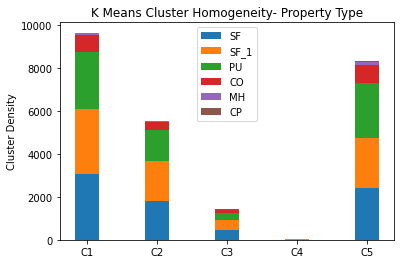

In [ ]:

sf_counts = np.asarray(sf_counts)
sf_1_counts = np.asarray(sf_1_counts)
pu_counts = np.asarray(pu_counts)
co_counts = np.asarray(co_counts)
mh_counts = np.asarray(mh_counts)
cp_counts = np.asarray(cp_counts)

import matplotlib.pyplot as plt
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, sf_counts, width,  label='SF')
ax.bar(labels, sf_1_counts, width,  bottom=sf_counts, label='SF_1')
ax.bar(labels, pu_counts, width,  bottom=sf_1_counts+sf_counts, label='PU')
ax.bar(labels, co_counts, width,  bottom=pu_counts+sf_1_counts+sf_counts, label='CO')
ax.bar(labels, mh_counts, width,  bottom=co_counts+pu_counts+sf_1_counts+sf_counts, label='MH')
ax.bar(labels, cp_counts, width,  bottom=mh_counts+co_counts+pu_counts+sf_1_counts+sf_counts, label='CP')

ax.set_ylabel('Cluster Density')
ax.set_title('K Means Cluster Homogeneity- Property Type')
ax.legend()

plt.show()

## 2- GMM

In [ ]:
from sklearn.mixture import GaussianMixture

usable_cols = fnma_numeric+fnma_cats

scaler = StandardScaler()

usable_cols = fnma_numeric+fnma_cats

num_centroid = len(fdmc['PROPERTY TYPE'].value_counts(dropna=False))

fnma_modeling_subset = copy.deepcopy(fnma_copy[usable_cols].drop('Property Type', axis=1))
scaler.fit(fnma_modeling_subset)
fnma_modeling_subset = scaler.transform(fnma_modeling_subset)

gmm = GaussianMixture(n_components=num_centroid, random_state=0).fit(fnma_modeling_subset)
predicted_clusters = gmm.predict(fnma_modeling_subset)

for value in list(set(predicted_clusters)):
    inds = np.where(predicted_clusters == value)[0]
    cluster_vals = fnma['Property Type'].iloc[inds]
    print(cluster_vals.value_counts())



SF      2172
PU      2125
SF_1    2070
CO       806
MH       121
CP        18
Name: Property Type, dtype: int64
SF      2887
SF_1    2851
PU      2726
CO       764
MH        58
CP        15
Name: Property Type, dtype: int64
PU      21
SF_1    10
SF       7
CO       6
MH       2
Name: Property Type, dtype: int64
SF_1    2201
SF      2118
PU      1716
CO       427
MH        53
CP        18
Name: Property Type, dtype: int64
SF_1    601
SF      549
PU      424
CO      203
MH       19
CP       12
Name: Property Type, dtype: int64


In [ ]:
labels = ['C1', 'C2', 'C3', 'C4', 'C5']
sf_counts = []
sf_1_counts = []
pu_counts = []
co_counts = []
mh_counts = []
cp_counts = []

for j, value in enumerate(list(set(predicted_clusters))):
    inds = np.where(predicted_clusters == value)[0]
    cluster_vals_vcs = fnma['Property Type'].iloc[inds].value_counts()
    print(cluster_vals_vcs)
    for i, val in enumerate(cluster_vals_vcs):
        if cluster_vals_vcs.index[i] == 'SF':
            sf_counts.append(val)
        elif cluster_vals_vcs.index[i] == 'PU':
            pu_counts.append(val)
        elif cluster_vals_vcs.index[i] == 'CO':
            co_counts.append(val)
        elif cluster_vals_vcs.index[i] == 'SF_1':
            sf_1_counts.append(val)
        elif cluster_vals_vcs.index[i] == 'MH':
            mh_counts.append(val)
        elif cluster_vals_vcs.index[i] == 'CP':
            cp_counts.append(val)

    for item in [sf_counts, pu_counts, co_counts, sf_1_counts, mh_counts, cp_counts]:
        if len(item) == j:
            item.append(0)

print(sf_counts)
print(sf_1_counts)
print(pu_counts)
print(co_counts)
print(mh_counts)
print(cp_counts)



SF      2172
PU      2125
SF_1    2070
CO       806
MH       121
CP        18
Name: Property Type, dtype: int64
SF      2887
SF_1    2851
PU      2726
CO       764
MH        58
CP        15
Name: Property Type, dtype: int64
PU      21
SF_1    10
SF       7
CO       6
MH       2
Name: Property Type, dtype: int64
SF_1    2201
SF      2118
PU      1716
CO       427
MH        53
CP        18
Name: Property Type, dtype: int64
SF_1    601
SF      549
PU      424
CO      203
MH       19
CP       12
Name: Property Type, dtype: int64
[2172, 2887, 7, 2118, 549]
[2070, 2851, 10, 2201, 601]
[2125, 2726, 21, 1716, 424]
[806, 764, 6, 427, 203]
[121, 58, 2, 53, 19]
[18, 15, 0, 18, 12]


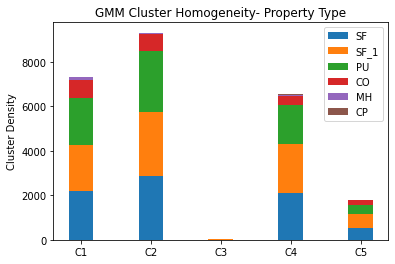

In [ ]:

sf_counts = np.asarray(sf_counts)
sf_1_counts = np.asarray(sf_1_counts)
pu_counts = np.asarray(pu_counts)
co_counts = np.asarray(co_counts)
mh_counts = np.asarray(mh_counts)
cp_counts = np.asarray(cp_counts)

import matplotlib.pyplot as plt
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, sf_counts, width,  label='SF')
ax.bar(labels, sf_1_counts, width,  bottom=sf_counts, label='SF_1')
ax.bar(labels, pu_counts, width,  bottom=sf_1_counts+sf_counts, label='PU')
ax.bar(labels, co_counts, width,  bottom=pu_counts+sf_1_counts+sf_counts, label='CO')
ax.bar(labels, mh_counts, width,  bottom=co_counts+pu_counts+sf_1_counts+sf_counts, label='MH')
ax.bar(labels, cp_counts, width,  bottom=mh_counts+co_counts+pu_counts+sf_1_counts+sf_counts, label='CP')

ax.set_ylabel('Cluster Density')
ax.set_title('GMM Cluster Homogeneity- Property Type')
ax.legend()

plt.show()

## Ideal Distribution


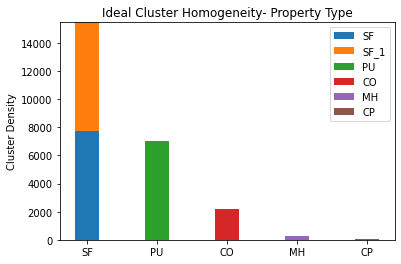

In [ ]:
labels = ['SF', 'PU', 'CO', 'MH', 'CP']
sf_counts = np.asarray([7733, 0, 0, 0, 0])
sf_1_counts = np.asarray([7733, 0, 0, 0, 0])
pu_counts = np.asarray([0, 7012, 0, 0, 0])
co_counts = np.asarray([0, 0, 2206, 0, 0])
mh_counts = np.asarray([0, 0, 0, 253, 0])
cp_counts = np.asarray([0, 0, 0, 0, 63])


import matplotlib.pyplot as plt
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, sf_counts, width,  label='SF')
ax.bar(labels, sf_1_counts, width,  bottom=sf_counts, label='SF_1')
ax.bar(labels, pu_counts, width,  bottom=sf_1_counts+sf_counts, label='PU')
ax.bar(labels, co_counts, width,  bottom=pu_counts+sf_1_counts+sf_counts, label='CO')
ax.bar(labels, mh_counts, width,  bottom=co_counts+pu_counts+sf_1_counts+sf_counts, label='MH')
ax.bar(labels, cp_counts, width,  bottom=mh_counts+co_counts+pu_counts+sf_1_counts+sf_counts, label='CP')

ax.set_ylabel('Cluster Density')
ax.set_title('Ideal Cluster Homogeneity- Property Type')
ax.legend()

plt.show()


## 3 - Multi-Class Classifier (requires shared columns)

In [ ]:

import tensorflow as tf

built_up_dataset = pd.DataFrame(columns=fdmc.columns)
max_val = max(fdmc_copy['PROPERTY TYPE'].value_counts())
for val in fdmc_copy['PROPERTY TYPE'].value_counts().index:
    val_inds = np.where(fdmc_copy['PROPERTY TYPE'] == val)[0]
    inds_to_upsample = np.random.choice(val_inds, size = max_val, replace=True)
    built_up_dataset = built_up_dataset.append(fdmc_copy.iloc[inds_to_upsample])

test_col = built_up_dataset['PROPERTY TYPE']

fdmc_modeling_cols = ['CREDIT SCORE',
                      'ORIGINAL_LTV',
                      'DTI',
                      'ORIGINAL_UPB',
                      'ORIGINAL_INTEREST_RATE',
                      'ORIGINAL_LOAN_TERM'
                      ]

fnma_modeling_cols = ['Borrower Credit Score at Origination',
                      'Original Loan to Value Ratio (LTV)',
                      'Debt-To-Income (DTI)',
                      'Original UPB',
                      'Original Interest Rate',
                      'Original Loan Term'
                      ]

scaler = StandardScaler()
scaler.fit(built_up_dataset[fdmc_modeling_cols])
built_up_dataset = pd.DataFrame(scaler.transform(built_up_dataset[fdmc_modeling_cols]), columns = fdmc_modeling_cols)

num_classes = len(fdmc['PROPERTY TYPE'].value_counts(dropna=False))


#Configure the model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(32, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(np.asarray(built_up_dataset).astype('float32'), np.asarray(test_col-1).astype('float32'), epochs=10)



fnma_modeling_subset = copy.deepcopy(fnma_copy[fnma_modeling_cols])
scaler.fit(fnma_modeling_subset)
fnma_modeling_subset = scaler.transform(fnma_modeling_subset)

predicted_classes = model.predict(fnma_modeling_subset)



Epoch 1/10
2522/2522 [==============================] - 6s 2ms/step - loss: 1.0562 - accuracy: 0.5329
Epoch 2/10
2522/2522 [==============================] - 5s 2ms/step - loss: 0.7928 - accuracy: 0.6263
Epoch 3/10
2522/2522 [==============================] - 5s 2ms/step - loss: 0.7239 - accuracy: 0.6487
Epoch 4/10
2522/2522 [==============================] - 5s 2ms/step - loss: 0.6958 - accuracy: 0.6573
Epoch 5/10
2522/2522 [==============================] - 5s 2ms/step - loss: 0.6781 - accuracy: 0.6632
Epoch 6/10
2522/2522 [==============================] - 5s 2ms/step - loss: 0.6691 - accuracy: 0.6663
Epoch 7/10
2522/2522 [==============================] - 5s 2ms/step - loss: 0.6598 - accuracy: 0.6694
Epoch 8/10
2522/2522 [==============================] - 5s 2ms/step - loss: 0.6530 - accuracy: 0.6716
Epoch 9/10
2522/2522 [==============================] - 5s 2ms/step - loss: 0.6482 - accuracy: 0.6747
Epoch 10/10
2522/2522 [==============================] - 5s 2ms/step - loss: 0.643

In [ ]:
predicted_clusters = np.argmax(predicted_classes, axis=1)+1
predicted_clusters

array([2, 2, 1, ..., 2, 2, 3])

In [ ]:
labels = ['C1', 'C2', 'C3', 'C4', 'C5']
sf_counts = []
sf_1_counts = []
pu_counts = []
co_counts = []
mh_counts = []
cp_counts = []

for j, value in enumerate(list(set(predicted_clusters))):
    inds = np.where(predicted_clusters == value)[0]
    cluster_vals_vcs = fnma['Property Type'].iloc[inds].value_counts()
    print(cluster_vals_vcs)
    for i, val in enumerate(cluster_vals_vcs):
        if cluster_vals_vcs.index[i] == 'SF':
            sf_counts.append(val)
        elif cluster_vals_vcs.index[i] == 'PU':
            pu_counts.append(val)
        elif cluster_vals_vcs.index[i] == 'CO':
            co_counts.append(val)
        elif cluster_vals_vcs.index[i] == 'SF_1':
            sf_1_counts.append(val)
        elif cluster_vals_vcs.index[i] == 'MH':
            mh_counts.append(val)
        elif cluster_vals_vcs.index[i] == 'CP':
            cp_counts.append(val)

    for item in [sf_counts, pu_counts, co_counts, sf_1_counts, mh_counts, cp_counts]:
        if len(item) == j:
            item.append(0)

print(sf_counts)
print(sf_1_counts)
print(pu_counts)
print(co_counts)
print(mh_counts)
print(cp_counts)

SF_1    3050
SF      3021
PU      2255
CO       667
MH       113
CP        15
Name: Property Type, dtype: int64
PU      2910
SF      2045
SF_1    2041
CO       606
CP        27
MH        21
Name: Property Type, dtype: int64
SF      2437
SF_1    2407
PU      1682
CO       873
MH        98
CP        18
Name: Property Type, dtype: int64
SF      143
SF_1    142
PU       84
CO       39
MH       12
Name: Property Type, dtype: int64
SF_1    93
SF      87
PU      81
CO      21
MH       9
CP       3
Name: Property Type, dtype: int64
[3021, 2045, 2437, 143, 87]
[3050, 2041, 2407, 142, 93]
[2255, 2910, 1682, 84, 81]
[667, 606, 873, 39, 21]
[113, 21, 98, 12, 9]
[15, 27, 18, 0, 3]


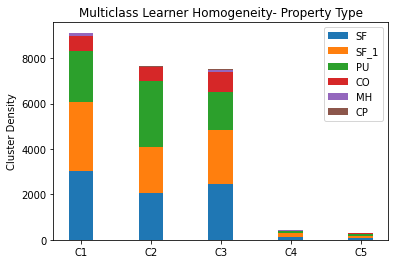

In [ ]:

sf_counts = np.asarray(sf_counts)
sf_1_counts = np.asarray(sf_1_counts)
pu_counts = np.asarray(pu_counts)
co_counts = np.asarray(co_counts)
mh_counts = np.asarray(mh_counts)
cp_counts = np.asarray(cp_counts)

import matplotlib.pyplot as plt
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, sf_counts, width,  label='SF')
ax.bar(labels, sf_1_counts, width,  bottom=sf_counts, label='SF_1')
ax.bar(labels, pu_counts, width,  bottom=sf_1_counts+sf_counts, label='PU')
ax.bar(labels, co_counts, width,  bottom=pu_counts+sf_1_counts+sf_counts, label='CO')
ax.bar(labels, mh_counts, width,  bottom=co_counts+pu_counts+sf_1_counts+sf_counts, label='MH')
ax.bar(labels, cp_counts, width,  bottom=mh_counts+co_counts+pu_counts+sf_1_counts+sf_counts, label='CP')

ax.set_ylabel('Cluster Density')
ax.set_title('Multiclass Learner Homogeneity- Property Type')
ax.legend()

plt.show()